In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# 한글깨짐 방지
import koreanize_matplotlib

In [4]:
# 데이터 불러오기
path='../data/Paris/listings.csv'
pd.read_csv(path)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20240316023852,2024-03-19,city scrape,zen and calm,Lovely Appartment with one bedroom with a Quee...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/miso/Hosting-...,3631,...,5.00,5.00,5.00,7511409139079,f,1,1,0,0,0.05
1,165409,https://www.airbnb.com/rooms/165409,20240316023852,2024-03-19,city scrape,studio charme Haut Marais PARIS,You'll love this typical parisian flat.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,788732,...,4.89,4.95,4.74,7510309597559,f,1,1,0,0,0.69
2,5396,https://www.airbnb.com/rooms/5396,20240316023852,2024-03-18,city scrape,Your perfect Paris studio on Île Saint-Louis,"NEW SOFA-BED SINCE JUNE 2023, Please disregard...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,...,4.84,4.96,4.58,7510402838018,f,2,1,1,0,2.19
3,166370,https://www.airbnb.com/rooms/166370,20240316023852,2024-03-16,city scrape,Big appartment with view 4 people,"2 Bedrooms apartment for up to 4 people, with ...",The avenue is located nearby the animated dist...,https://a0.muscache.com/pictures/74224563/6c9e...,793032,...,4.79,4.65,4.48,7511007974397,f,1,1,0,0,0.51
4,39948,https://www.airbnb.com/rooms/39948,20240316023852,2024-03-19,previous scrape,COSY INDEPENDENT ROOM IN CENTRAL PARIS,Large newly-renovated guest room in central Pa...,"Located in the heart of Paris, The Montorgueil...",https://a0.muscache.com/pictures/f898fb0b-e72e...,171483,...,4.97,4.94,4.82,7510200734360,f,1,0,1,0,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84392,1112562855977040914,https://www.airbnb.com/rooms/1112562855977040914,20240316023852,2024-03-19,city scrape,Artists neighbour apt /private yard 10mn Print...,Simplify your life at this peaceful place<br /...,NaN,https://a0.muscache.com/pictures/692d2ee5-8469...,448413156,...,NaN,NaN,NaN,7510164795125,t,15,15,0,0,NaN
84393,1112591023192990750,https://www.airbnb.com/rooms/1112591023192990750,20240316023852,2024-03-18,city scrape,Appartement Tour Eiffel - Porte Dauphine - 2 Pers,Nestled in the heart of the prestigious 16th a...,"A l’orée du bois, le jardin du Ranelagh est un...",https://a0.muscache.com/pictures/miso/Hosting-...,528792181,...,NaN,NaN,NaN,7511612355663,t,6,6,0,0,NaN
84394,1112842648117310093,https://www.airbnb.com/rooms/1112842648117310093,20240316023852,2024-03-19,city scrape,1621: Prime spot in Paris Olympic Games 2024,Discover the allure of our generously proporti...,Embark on an enchanting voyage of discovery th...,https://a0.muscache.com/pictures/prohost-api/H...,530443572,...,NaN,NaN,NaN,7510912350413,t,6,6,0,0,NaN
84395,1112843324939236177,https://www.airbnb.com/rooms/1112843324939236177,20240316023852,2024-03-18,city scrape,Stylish flat in the heart of the city,Welcome to Paris! We are delighted to welcome ...,The 6th arrondissement is home to Saint-Germai...,https://a0.muscache.com/pictures/prohost-api/H...,504268004,...,NaN,NaN,NaN,7510608018554,t,47,47,0,0,NaN


In [5]:
raw = pd.read_csv(path)
dat = raw.copy()
dat.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20240316023852,2024-03-19,city scrape,zen and calm,Lovely Appartment with one bedroom with a Quee...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/miso/Hosting-...,3631,...,5.00,5.00,5.00,7511409139079,f,1,1,0,0,0.05
1,165409,https://www.airbnb.com/rooms/165409,20240316023852,2024-03-19,city scrape,studio charme Haut Marais PARIS,You'll love this typical parisian flat.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,788732,...,4.89,4.95,4.74,7510309597559,f,1,1,0,0,0.69
2,5396,https://www.airbnb.com/rooms/5396,20240316023852,2024-03-18,city scrape,Your perfect Paris studio on Île Saint-Louis,"NEW SOFA-BED SINCE JUNE 2023, Please disregard...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,...,4.84,4.96,4.58,7510402838018,f,2,1,1,0,2.19
3,166370,https://www.airbnb.com/rooms/166370,20240316023852,2024-03-16,city scrape,Big appartment with view 4 people,"2 Bedrooms apartment for up to 4 people, with ...",The avenue is located nearby the animated dist...,https://a0.muscache.com/pictures/74224563/6c9e...,793032,...,4.79,4.65,4.48,7511007974397,f,1,1,0,0,0.51
4,39948,https://www.airbnb.com/rooms/39948,20240316023852,2024-03-19,previous scrape,COSY INDEPENDENT ROOM IN CENTRAL PARIS,Large newly-renovated guest room in central Pa...,"Located in the heart of Paris, The Montorgueil...",https://a0.muscache.com/pictures/f898fb0b-e72e...,171483,...,4.97,4.94,4.82,7510200734360,f,1,0,1,0,0.99


property_type (숙소_유형) 추가
 - room_type 컬럼명 변경 : 숙소_유형 -> 방_유형

In [6]:
# 숙소 관련 테이블
# 02와 변경점 ('host_response_time','host_response_rate','host_acceptance_rate'[ 답변_평균시간, 문의_응답률, 예약_수락률] 삭제)
# >> 이유 : 슈퍼 호스트 기준에 포함되는 속성들이라 중복됨.
df_lodging = dat[['id', 'host_id','listing_url','host_is_superhost','host_total_listings_count','neighbourhood_cleansed', 'room_type',
                  'property_type','accommodates','bathrooms','bedrooms','beds','amenities','price','minimum_nights','maximum_nights']]
df_lodging.head(3)

,id,host_id,listing_url,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,room_type,property_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights
0,3109,3631,https://www.airbnb.com/rooms/3109,f,2.0,Observatoire,Entire home/apt,Entire rental unit,2,1.0,1.0,1.0,"[""Cooking basics"", ""Luggage dropoff allowed"", ...",$250.00,2,30
1,165409,788732,https://www.airbnb.com/rooms/165409,t,1.0,Temple,Entire home/apt,Entire rental unit,2,1.0,0.0,1.0,"[""Lockbox"", ""Wifi"", ""Kitchen"", ""Refrigerator"",...",$140.00,3,365
2,5396,7903,https://www.airbnb.com/rooms/5396,f,3.0,Hôtel-de-Ville,Entire home/apt,Entire rental unit,2,1.0,0.0,1.0,"[""Cooking basics"", ""Long term stays allowed"", ...",$107.00,1,1125


In [7]:
# 컬럼명 변경

df_lodging = df_lodging.rename(columns={
    'id': '숙소_id',
    'host_id': '호스트_id',
    'listing_url':'url',
    'host_is_superhost': '슈퍼호스트',
    'host_total_listings_count': '숙소_수',
    'neighbourhood_cleansed': '숙소_지역',
    'room_type': '숙소_유형',
    'property_type':'숙소_특징',
    'accommodates': '수용인원수',
    'bathrooms': '욕실수',
    'bedrooms': '침실수',
    'beds': '침대수',
    'amenities': '편의시설',
    'price': '숙소_가격',
    'minimum_nights': '최소_숙박일',
    'maximum_nights': '최대_숙박일'
})

df_lodging.head(3)


,숙소_id,호스트_id,url,슈퍼호스트,숙소_수,숙소_지역,숙소_유형,숙소_특징,수용인원수,욕실수,침실수,침대수,편의시설,숙소_가격,최소_숙박일,최대_숙박일
0,3109,3631,https://www.airbnb.com/rooms/3109,f,2.0,Observatoire,Entire home/apt,Entire rental unit,2,1.0,1.0,1.0,"[""Cooking basics"", ""Luggage dropoff allowed"", ...",$250.00,2,30
1,165409,788732,https://www.airbnb.com/rooms/165409,t,1.0,Temple,Entire home/apt,Entire rental unit,2,1.0,0.0,1.0,"[""Lockbox"", ""Wifi"", ""Kitchen"", ""Refrigerator"",...",$140.00,3,365
2,5396,7903,https://www.airbnb.com/rooms/5396,f,3.0,Hôtel-de-Ville,Entire home/apt,Entire rental unit,2,1.0,0.0,1.0,"[""Cooking basics"", ""Long term stays allowed"", ...",$107.00,1,1125


In [8]:
# 리뷰 데이터 테이블
df_review = dat[['number_of_reviews', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 
                'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
                'review_scores_location', 'review_scores_value', 'reviews_per_month']]
df_review.head(3)


,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,4,0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.05
1,106,0,4.68,4.72,4.59,4.87,4.89,4.95,4.74,0.69
2,393,5,4.60,4.63,4.57,4.81,4.84,4.96,4.58,2.19


In [9]:
# 컬럼명 변경
df_review = df_review.rename(columns={
    'number_of_reviews': '리뷰수',
    'number_of_reviews_l30d': '30일_리뷰수',
    'review_scores_rating': '리뷰점수',
    'review_scores_accuracy': '숙소_정확성_리뷰점수',
    'review_scores_cleanliness': '숙소_청결도_리뷰점수',
    'review_scores_checkin': '숙소_체크인_리뷰점수',
    'review_scores_communication': '숙소_소통_리뷰점수',
    'review_scores_location': '숙소_위치_리뷰점수',
    'review_scores_value': '숙소_가격_리뷰점수',
    'reviews_per_month': '평균_리뷰수'
})
df_review.head()


,리뷰수,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수
0,4,0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.05
1,106,0,4.68,4.72,4.59,4.87,4.89,4.95,4.74,0.69
2,393,5,4.60,4.63,4.57,4.81,4.84,4.96,4.58,2.19
3,78,0,4.56,4.74,4.37,4.82,4.79,4.65,4.48,0.51
4,126,3,4.86,4.93,4.82,4.96,4.97,4.94,4.82,0.99


01 전처리 과정 중 통합된 테이블의 필요성을 느낌

In [10]:
# 테이블 합치기
df = pd.concat([df_lodging,df_review], axis=1)
df.head()

,숙소_id,호스트_id,url,슈퍼호스트,숙소_수,숙소_지역,숙소_유형,숙소_특징,수용인원수,욕실수,...,리뷰수,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수
0,3109,3631,https://www.airbnb.com/rooms/3109,f,2.0,Observatoire,Entire home/apt,Entire rental unit,2,1.0,...,4,0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.05
1,165409,788732,https://www.airbnb.com/rooms/165409,t,1.0,Temple,Entire home/apt,Entire rental unit,2,1.0,...,106,0,4.68,4.72,4.59,4.87,4.89,4.95,4.74,0.69
2,5396,7903,https://www.airbnb.com/rooms/5396,f,3.0,Hôtel-de-Ville,Entire home/apt,Entire rental unit,2,1.0,...,393,5,4.60,4.63,4.57,4.81,4.84,4.96,4.58,2.19
3,166370,793032,https://www.airbnb.com/rooms/166370,f,3.0,Entrepôt,Entire home/apt,Entire rental unit,4,1.0,...,78,0,4.56,4.74,4.37,4.82,4.79,4.65,4.48,0.51
4,39948,171483,https://www.airbnb.com/rooms/39948,t,2.0,Bourse,Private room,Private room in guest suite,2,NaN,...,126,3,4.86,4.93,4.82,4.96,4.97,4.94,4.82,0.99


In [11]:
# 정보 확인
df.info()
# total 24 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84397 entries, 0 to 84396
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_id        84397 non-null  int64  
 1   호스트_id       84397 non-null  int64  
 2   url          84397 non-null  object 
 3   슈퍼호스트        84306 non-null  object 
 4   숙소_수         84390 non-null  float64
 5   숙소_지역        84397 non-null  object 
 6   숙소_유형        84397 non-null  object 
 7   숙소_특징        84397 non-null  object 
 8   수용인원수        84397 non-null  int64  
 9   욕실수          60959 non-null  float64
 10  침실수          77480 non-null  float64
 11  침대수          60828 non-null  float64
 12  편의시설         84397 non-null  object 
 13  숙소_가격        60917 non-null  object 
 14  최소_숙박일       84397 non-null  int64  
 15  최대_숙박일       84397 non-null  int64  
 16  리뷰수          84397 non-null  int64  
 17  30일_리뷰수      84397 non-null  int64  
 18  리뷰점수         58827 non-null  float64
 19  숙소_정

In [12]:
df.isnull().sum()

숙소_id              0
호스트_id             0
url                0
슈퍼호스트             91
숙소_수               7
숙소_지역              0
숙소_유형              0
숙소_특징              0
수용인원수              0
욕실수            23438
침실수             6917
침대수            23569
편의시설               0
숙소_가격          23480
최소_숙박일             0
최대_숙박일             0
리뷰수                0
30일_리뷰수            0
리뷰점수           25570
숙소_정확성_리뷰점수    25604
숙소_청결도_리뷰점수    25600
숙소_체크인_리뷰점수    25613
숙소_소통_리뷰점수     25602
숙소_위치_리뷰점수     25610
숙소_가격_리뷰점수     25615
평균_리뷰수         25575
dtype: int64

숙소_가격에 대한 욕실,침실,침대 상관계수만 파악

In [13]:
# '$' 기호와 ',' 제거 후 실수(float) 형태로 변환
df.loc[:, '숙소_가격'] = df['숙소_가격'].replace('[$,]', '', regex=True).astype(float)
df['숙소_가격']

0        250.0
1        140.0
2        107.0
3        200.0
4          NaN
         ...  
84392     80.0
84393    167.0
84394     98.0
84395    296.0
84396     71.0
Name: 숙소_가격, Length: 84397, dtype: object

In [14]:
# 상관계수 파악을 위해 null값 제거
df.dropna(subset=['숙소_가격', '욕실수', '침실수', '침대수'], inplace=True)

In [15]:
df.isnull().sum()

숙소_id              0
호스트_id             0
url                0
슈퍼호스트             68
숙소_수               0
숙소_지역              0
숙소_유형              0
숙소_특징              0
수용인원수              0
욕실수                0
침실수                0
침대수                0
편의시설               0
숙소_가격              0
최소_숙박일             0
최대_숙박일             0
리뷰수                0
30일_리뷰수            0
리뷰점수           18988
숙소_정확성_리뷰점수    19012
숙소_청결도_리뷰점수    19010
숙소_체크인_리뷰점수    19014
숙소_소통_리뷰점수     19011
숙소_위치_리뷰점수     19013
숙소_가격_리뷰점수     19017
평균_리뷰수         18993
dtype: int64

MinMaxScaler

In [16]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 선택한 열들에 대해 min-max 스케일링 적용
df_scaled = df[['숙소_가격', '욕실수', '침실수', '침대수']]
df_scaled = scaler.fit_transform(df_scaled)

# 스케일링된 데이터를 다시 DataFrame으로 변환
df_scaled = pd.DataFrame(df_scaled, columns=['숙소_가격', '욕실수', '침실수', '침대수'])

# 스케일링된 데이터와 원본 데이터를 합칠 수도 있음
# df = pd.concat([df, df_scaled], axis=1)


상관계수 확인

In [17]:
correlation = df_scaled[['숙소_가격', '욕실수', '침실수', '침대수']].corr()
print(correlation)

          숙소_가격       욕실수       침실수       침대수
숙소_가격  1.000000  0.235181  0.233313  0.172403
욕실수    0.235181  1.000000  0.629612  0.547907
침실수    0.233313  0.629612  1.000000  0.665821
침대수    0.172403  0.547907  0.665821  1.000000


비트맵 시각화

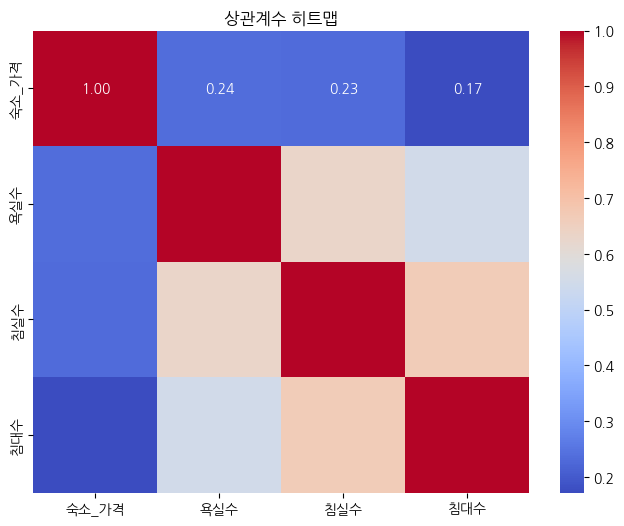

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관계수 행렬을 시각화
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('상관계수 히트맵')
plt.show()


회귀분석

In [19]:
import numpy as np
import statsmodels.api as sm

# 종속변수와 독립변수 설정
X = df[['욕실수', '침실수', '침대수']].astype(float)  # 데이터 유형을 명시적으로 float로 변환
y = df['숙소_가격'].astype(float)  # 데이터 유형을 명시적으로 float로 변환

# 입력 데이터를 NumPy 배열로 변환
X = sm.add_constant(np.asarray(X))

# OLS 모델 적합
model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  숙소_가격   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     1460.
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        09:50:49   Log-Likelihood:            -4.8389e+05
No. Observations:               60668   AIC:                         9.678e+05
Df Residuals:                   60664   BIC:                         9.678e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -78.6158      6.735    -11.673      0.0

결과 확인 : 
 - R-squared : 0.067  -> 설명도 매우 부족!
 - 욕실수, 침실수, 침대수는 숙소_가격와 양의 상관관계가 아니다!

숙소_가격과 양의 상관관계가 있을 법한 컬럼 찾기
 - '숙소_가격', '숙소_유형', '숙소_특징', '수용인원수', '최소_숙박일', '최대_숙박일'
 - null값이 없었으므로 바로 minmax스케일부터 진행

범주형 데이터들 라벨링 진행

In [20]:
df['숙소_유형'].value_counts()

숙소_유형
Entire home/apt    54874
Private room        5055
Hotel room           457
Shared room          282
Name: count, dtype: int64

In [21]:
df['숙소_특징'].unique()

array(['Entire rental unit', 'Private room in rental unit',
       'Entire condo', 'Entire loft', 'Entire townhouse',
       'Private room in townhouse', 'Private room in guest suite',
       'Private room in condo', 'Entire home',
       'Private room in bed and breakfast', 'Entire serviced apartment',
       'Private room in loft', 'Shared room in rental unit', 'Floor',
       'Entire guesthouse', 'Room in bed and breakfast',
       'Private room in guesthouse', 'Houseboat', 'Private room',
       'Entire place', 'Entire villa', 'Entire guest suite',
       'Private room in tiny home', 'Private room in home',
       'Room in boutique hotel', 'Private room in earthen home',
       'Room in serviced apartment', 'Entire bed and breakfast', 'Boat',
       'Room in hotel', 'Tiny home', 'Private room in villa',
       'Shared room in condo', 'Shared room in tiny home',
       'Shared room in loft', 'Shared room in farm stay',
       'Private room in serviced apartment', 'Entire vacation ho

In [22]:
# 숙소_유형 라벨링
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['숙소_유형_라벨'] = label_encoder.fit_transform(df['숙소_유형'])

In [23]:
df['숙소_유형_라벨'].unique()

array([0, 2, 3, 1])

0은 "Entire home/apt", <br>
1은 "Private room", <br>
2는 "Hotel room", <br>
3은 "Shared room"<br>

In [24]:
# 숙소_특징 라벨링
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['숙소_특징_라벨'] = label_encoder.fit_transform(df['숙소_특징'])

In [26]:
df['숙소_특징_라벨'].value_counts()

숙소_특징_라벨
15    51129
34     2977
8      1839
43      825
13      716
      ...  
28        1
7         1
50        1
61        1
40        1
Name: count, Length: 64, dtype: int64

In [32]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 선택한 열들에 대해 min-max 스케일링 적용
df_scaled = df[['숙소_가격', '숙소_유형_라벨', '숙소_특징_라벨', '수용인원수', '최소_숙박일', '최대_숙박일']]
df_scaled = scaler.fit_transform(df_scaled)

# 스케일링된 데이터를 다시 DataFrame으로 변환
df_scaled = pd.DataFrame(df_scaled, columns=['숙소_가격', '숙소_유형_라벨', '숙소_특징_라벨', '수용인원수', '최소_숙박일', '최대_숙박일'])

# 스케일링된 데이터와 원본 데이터를 합칠 수도 있음
# df = pd.concat([df, df_scaled], axis=1)

In [33]:
correlation = df_scaled[['숙소_가격', '숙소_유형_라벨', '숙소_특징_라벨', '수용인원수', '최소_숙박일', '최대_숙박일']].corr()
print(correlation)

             숙소_가격  숙소_유형_라벨  숙소_특징_라벨     수용인원수    최소_숙박일    최대_숙박일
숙소_가격     1.000000 -0.030609 -0.018499  0.235855 -0.004757 -0.000797
숙소_유형_라벨 -0.030609  1.000000  0.905597 -0.211766 -0.054373 -0.001296
숙소_특징_라벨 -0.018499  0.905597  1.000000 -0.197848 -0.053939 -0.001049
수용인원수     0.235855 -0.211766 -0.197848  1.000000 -0.038048 -0.003173
최소_숙박일   -0.004757 -0.054373 -0.053939 -0.038048  1.000000 -0.000785
최대_숙박일   -0.000797 -0.001296 -0.001049 -0.003173 -0.000785  1.000000


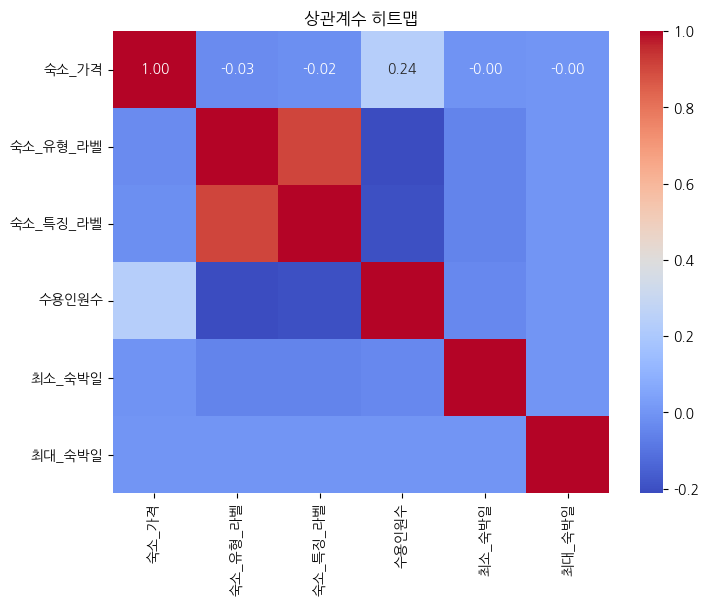

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관계수 행렬을 시각화
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('상관계수 히트맵')
plt.show()

In [36]:
import numpy as np
import statsmodels.api as sm

# 종속변수와 독립변수 설정
X = df[['숙소_유형_라벨', '숙소_특징_라벨', '수용인원수', '최소_숙박일', '최대_숙박일']].astype(float)  # 데이터 유형을 명시적으로 float로 변환
y = df['숙소_가격'].astype(float)  # 데이터 유형을 명시적으로 float로 변환

# 입력 데이터를 NumPy 배열로 변환
X = sm.add_constant(np.asarray(X))

# OLS 모델 적합
model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  숙소_가격   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     729.1
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        09:58:33   Log-Likelihood:            -4.8424e+05
No. Observations:               60668   AIC:                         9.685e+05
Df Residuals:                   60662   BIC:                         9.685e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -146.3763     15.849     -9.236      0.0

잘못 돌렸나?? 결과가 왜이러지...